In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
movies_raw = pd.read_csv("../examples/movies/movies_metadata.csv")

C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
movies_raw.drop(["belongs_to_collection","imdb_id","tagline","spoken_languages","overview","poster_path","video","homepage","original_title"],axis=1,inplace=True)

In [4]:
movies_raw.head()

,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [5]:
movies_raw.dropna(inplace=True)

At first I wanted to do it it like the function seen below but pandas didn't understand that it would be converted to a list and still thought of it as if it was a string. I still don't know why this didn't work because when I used a testcolumn it seemed fine

In [6]:
import ast

def extract_json(data):
    stripped = data.strip("][")
    lis = list(ast.literal_eval(stripped))
    return [lis[i]["name"] for i in range(len(lis))]
    
extract_json(movies_raw["production_companies"][10])

['Columbia Pictures', 'Castle Rock Entertainment']

Then my second approach was using some *Regular Expressions*. I still think the first one was way better and works somehow

In [7]:
movies_raw.genres.str.findall(r"('name': '[A-Za-z]+')")

0        ['name': 'Animation', 'name': 'Comedy', 'name'...
1        ['name': 'Adventure', 'name': 'Fantasy', 'name...
2                    ['name': 'Romance', 'name': 'Comedy']
3        ['name': 'Comedy', 'name': 'Drama', 'name': 'R...
4                                       ['name': 'Comedy']
                               ...                        
45460    ['name': 'Drama', 'name': 'Action', 'name': 'R...
45462                                    ['name': 'Drama']
45463    ['name': 'Action', 'name': 'Drama', 'name': 'T...
45464                                                   []
45465                                                   []
Name: genres, Length: 45043, dtype: object

As seen below I realized I could then manipulate the lists to only get the relevant data for me

In [8]:
# stripped_genres[0][0].split(":")[1].strip().strip("''")

I'm sure there is some pandas version to do this which would be more efficient but I couldn't find one. **Apply(lambda x...)** didn't do the trick and I couldn't figure out any other string method

In [9]:
movies_raw.head()

,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [10]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45465
Data columns (total 15 columns):
adult                   45043 non-null object
budget                  45043 non-null object
genres                  45043 non-null object
id                      45043 non-null object
original_language       45043 non-null object
popularity              45043 non-null object
production_companies    45043 non-null object
production_countries    45043 non-null object
release_date            45043 non-null object
revenue                 45043 non-null float64
runtime                 45043 non-null float64
status                  45043 non-null object
title                   45043 non-null object
vote_average            45043 non-null float64
vote_count              45043 non-null float64
dtypes: float64(4), object(11)
memory usage: 4.6+ MB


I found a regex that can grab all the important info from the other columns too without having to alter it every single time

In [11]:
movies_raw["production_companies"].str.findall(r"('name': '[\w\s]+')")

0                      ['name': 'Pixar Animation Studios']
1        ['name': 'TriStar Pictures', 'name': 'Teitler ...
2                               ['name': 'Lancaster Gate']
3        ['name': 'Twentieth Century Fox Film Corporati...
4        ['name': 'Sandollar Productions', 'name': 'Tou...
                               ...                        
45460    ['name': 'Working Title Films', 'name': '20th ...
45462                              ['name': 'Sine Olivia']
45463                  ['name': 'American World Pictures']
45464                                ['name': 'Yermoliev']
45465                                                   []
Name: production_companies, Length: 45043, dtype: object

Now that I figured out how to do it after several hours I tried to convert it to function to call it over the other columns where we have the same problem.

In [12]:
def clean_element(column):
    for i in range(len(column)):
        column[i] = [column[i][x].split(":")[1].strip().strip("''") for x in range(len(column[i]))]

The function above didn't really work and it had a for-loop which made it extra slow. I would've hoped to solve the problem with the syntax below but *literal_eval* didn't work unfortunately

In [13]:
list(ast.literal_eval(movies_raw.production_countries[0]))[0]["name"]

'United States of America'

Here I've written the function to transform all the messy data from the columns into a nice list. I actually like this function because it's fast and can be called on every column

In [14]:
def cleanup(df,column):
    regex = df[column].str.findall(r"('name': '[\w\s]+')")
    df[column] = regex.apply(lambda x: [x[i].split(":")[1].strip().strip("''") for i in range(len(x))])

In [15]:
cleanup(movies_raw,"production_countries")

In [16]:
cleanup(movies_raw,"production_companies")

In [17]:
cleanup(movies_raw,"genres")

Though it can't be called with **apply()** I think it's not that bad as it still does the trick

In [18]:
# movies_raw.apply(cleanup,column="production_companies")

In [19]:
movies_raw.head()

,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000,"[Animation, Comedy, Family]",862,en,21.9469,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,0,"[Romance, Comedy]",15602,en,11.7129,[Lancaster Gate],[United States of America],1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,"[Comedy, Drama, Romance]",31357,en,3.85949,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,0,[Comedy],11862,en,8.38752,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [20]:
movies_raw["release_date"] = pd.to_datetime(movies_raw["release_date"])

In [21]:
movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45465
Data columns (total 15 columns):
adult                   45043 non-null object
budget                  45043 non-null object
genres                  45043 non-null object
id                      45043 non-null object
original_language       45043 non-null object
popularity              45043 non-null object
production_companies    45043 non-null object
production_countries    45043 non-null object
release_date            45043 non-null datetime64[ns]
revenue                 45043 non-null float64
runtime                 45043 non-null float64
status                  45043 non-null object
title                   45043 non-null object
vote_average            45043 non-null float64
vote_count              45043 non-null float64
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 4.8+ MB


In [22]:
movies_raw.sort_values(by=["release_date"],ascending=False,inplace=True)

In [23]:
movies_raw.reset_index(inplace=True)

In [24]:
movies_raw.head()

,index,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,26559,False,0,"[Action, Adventure, Fantasy, Science Fiction]",76600,en,6.02006,"[Twentieth Century Fox Film Corporation, Light...",[United States of America],2020-12-16,0.0,0.0,In Production,Avatar 2,0.0,58.0
1,38885,False,12000000,"[Comedy, Drama]",299782,en,0.238154,[SACI],"[Iran, United States of America]",2018-12-31,0.0,0.0,Post Production,The Other Side of the Wind,0.0,1.0
2,30402,False,0,"[Thriller, Action, Crime]",38700,en,2.17855,"[Columbia Pictures, Sony Pictures, Jerry Bruck...",[United States of America],2018-11-07,0.0,0.0,Planned,Bad Boys for Life,0.0,12.0
3,38130,False,0,"[Drama, Romance]",332283,en,3.328261,"[Parallel Films, Gidden Media, Juliette Films]","[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,Post Production,Mary Shelley,0.0,1.0
4,44535,False,0,[Drama],412059,en,0.155147,[],"[France, Canada]",2018-04-04,0.0,105.0,Post Production,Mobile Homes,0.0,1.0


###### Creating a new Dataframe based on genres

In [27]:
row_length = movies_raw.genres.str.len()
row_length.head()

0    4
1    2
2    3
3    2
4    1
Name: genres, dtype: int64

In [28]:
movies_raw.genres[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [29]:
movies_raw.head()

,index,adult,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,26559,False,0,"[Action, Adventure, Fantasy, Science Fiction]",76600,en,6.02006,"[Twentieth Century Fox Film Corporation, Light...",[United States of America],2020-12-16,0.0,0.0,In Production,Avatar 2,0.0,58.0
1,38885,False,12000000,"[Comedy, Drama]",299782,en,0.238154,[SACI],"[Iran, United States of America]",2018-12-31,0.0,0.0,Post Production,The Other Side of the Wind,0.0,1.0
2,30402,False,0,"[Thriller, Action, Crime]",38700,en,2.17855,"[Columbia Pictures, Sony Pictures, Jerry Bruck...",[United States of America],2018-11-07,0.0,0.0,Planned,Bad Boys for Life,0.0,12.0
3,38130,False,0,"[Drama, Romance]",332283,en,3.328261,"[Parallel Films, Gidden Media, Juliette Films]","[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,Post Production,Mary Shelley,0.0,1.0
4,44535,False,0,[Drama],412059,en,0.155147,[],"[France, Canada]",2018-04-04,0.0,105.0,Post Production,Mobile Homes,0.0,1.0


We create the new Df by repeating the row by the current length of the gernes of a single row

In [30]:
single_genres = pd.DataFrame({"Vote_Avg":np.repeat(movies_raw.vote_average,row_length),"Genre":np.concatenate(movies_raw.genres)})
single_genres

,Vote_Avg,Genre
0,0.0,Action
0,0.0,Adventure
0,0.0,Fantasy
0,0.0,Science Fiction
1,0.0,Comedy
...,...,...
45038,4.4,Documentary
45039,4.1,Documentary
45040,5.4,Documentary
45041,6.2,Documentary


Now that we have the new Dataframe with the single genres we can plot them to see which Genre occurs the most in our Dataset

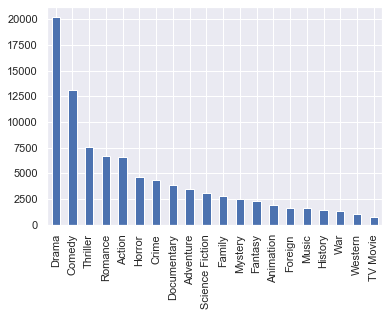

In [31]:
%matplotlib inline

single_genres.Genre.value_counts().plot.bar()

If we wanted to see what Genre gets the highest ratings we can groupby the genres and calculate the mean from every genre

In [43]:
movies_raw.vote_average.describe()

count    45043.000000
mean         5.637648
std          1.896656
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

###### Genres with best rating

In [61]:
top5_genres = single_genres.groupby("Genre").mean().sort_values(by="Vote_Avg",ascending=False).head()
top5_genres

,Vote_Avg
Genre,
Animation,6.285187
History,6.170690
War,6.047872
Drama,5.913850
Music,5.879524


To get the genres with the worst ratings we just sort by ascending instead of descending

In [65]:
worst5_genres = single_genres.groupby("Genre").mean().sort_values(by="Vote_Avg",ascending=True).head()
worst5_genres

,Vote_Avg
Genre,
Western,5.172142
Horror,5.230247
TV Movie,5.248810
Science Fiction,5.353252
Action,5.590084


###### Budget column
Maybe we can derive some interesting information from the budget column. Lets check what its made of

In [93]:
movies_raw.budget.describe()

count     45043
unique     1218
top           0
freq      36170
Name: budget, dtype: object

Checking how many values are **0**

In [90]:
movies_raw.budget.value_counts()

0           36170
5000000       286
10000000      259
20000000      243
2000000       241
            ...  
10831173        1
6105121         1
176000          1
4002313         1
10750000        1
Name: budget, Length: 1218, dtype: int64

In [91]:
movies_raw.budget.value_counts()[0]

36170

In [88]:
movies_raw.budget.count()

45043

By dividing with the total amount of values in the budget column we see that about 80% is made of zeros. So it wouldn't be very informative to actually try and do some computations on that column

In [92]:
movies_raw.budget.value_counts()[0] / movies_raw.budget.count()

0.803010456674733

###### Popularity column
Maybe the popularity column is interesting

In [101]:
movies_raw.popularity.astype(np.float64).describe()

count    45043.000000
mean         2.946408
std          6.027265
min          0.000000
25%          0.399826
50%          1.143067
75%          3.737918
max        547.488298
Name: popularity, dtype: float64

###### Revenue column
The revenue column also has way too much missing data (meaning revenue = 0) to do any fun computations

In [105]:
movies_raw.revenue.value_counts()

0.0            37643
12000000.0        20
11000000.0        19
10000000.0        19
2000000.0         18
               ...  
5965.0             1
189198313.0        1
714766572.0        1
215339.0           1
48143579.0         1
Name: revenue, Length: 6857, dtype: int64

###### language
We can see that most of the movies' original language is english. About 2500 movies are french and 1500 italian

In [112]:
movies_raw.original_language.value_counts().head(10)

en    32130
fr     2413
it     1466
ja     1349
de     1028
es      965
ru      805
hi      508
ko      444
zh      408
Name: original_language, dtype: int64

In [131]:
top_lang = movies_raw.groupby("original_language")[["vote_average"]].mean().loc[["en","fr","de","it","ja","es"],:].sort_values(by="vote_average",ascending=False)
top_lang

,vote_average
original_language,
ja,6.274203
fr,6.080232
de,5.982977
es,5.784663
it,5.521419
en,5.501086


In [135]:
top_lang.rename(index={"ja":"Japanese","fr":"French","de":"German","it":"Italian","en":"English","es":"Spanish"},inplace=True)
top_lang

,vote_average
original_language,
Japanese,6.274203
French,6.080232
German,5.982977
Spanish,5.784663
Italian,5.521419
English,5.501086


As we can see the japanese movies get the highest rating on average. The fact that the english movies have the worst rating doesn't necessarily mean that they are worse than the other language-movies. Because there are so many english movies in the dataset the vote-average evens out. If less people rated a movie the more extreme the result might be. The bigger the group of people that rated the movie the more unlikely it becomes that there will be an extreme result 

###### Production companies

In [146]:
row_length_com = movies_raw.production_companies.str.len()

production_companies = pd.DataFrame({"Production_companies":np.concatenate(movies_raw.production_companies),
                                     "Vote_avg":np.repeat(movies_raw.vote_average,row_length_com)})

I now check which production companies have the most votes to actually have a somewhat correct result. There are many production-companies that have only brought out one movie with a rating of 10. That wouldn't be well founded information

In [166]:
vote_nr = production_companies.groupby("Production_companies").count().sort_values(by="Vote_avg").tail(10).rename(columns={"Vote_avg":"Number of Votes"})
vote_nr

,Number of Votes
Production_companies,
Touchstone Pictures,225
Walt Disney Pictures,263
New Line Cinema,277
United Artists,279
RKO Radio Pictures,290
Columbia Pictures,431
Columbia Pictures Corporation,448
Universal Pictures,830
Twentieth Century Fox Film Corporation,836


As we can see *Disney* movies are the ones with the highest rating on average. This also corresponds to our genre-rating-table. There it said that animation is the genre with the highest rating on avg and Disney mostly does animation-movies.

In [170]:
production_companies.groupby("Production_companies").mean().loc[vote_nr.index,:].sort_values(by="Vote_avg",ascending=False)

,Vote_avg
Production_companies,
Walt Disney Pictures,6.238403
United Artists,6.119713
Universal Pictures,6.089036
Twentieth Century Fox Film Corporation,6.017584
Touchstone Pictures,5.991111
Paramount Pictures,5.939022
New Line Cinema,5.900361
Columbia Pictures,5.882599
Columbia Pictures Corporation,5.801339
